In [7]:
%load_ext sagemaker_studio_analytics_extension.magics
%sm_analytics emr connect --cluster-id j-1UZ7AR2KJREZZ --auth-type None --language python  

The sagemaker_studio_analytics_extension.magics extension is already loaded. To reload it, use:
  %reload_ext sagemaker_studio_analytics_extension.magics
Successfully read emr cluster(j-1UZ7AR2KJREZZ) details
Initiating EMR connection..
Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
14,application_1675488897820_0015,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.
{"namespace": "sagemaker-analytics", "cluster_id": "j-1UZ7AR2KJREZZ", "error_message": null, "success": true, "service": "emr", "operation": "connect"}


In [8]:
%%configure -f
{ "conf":{
          "spark.pyspark.python": "python3",
          "spark.pyspark.virtualenv.enabled": "true",
          "spark.pyspark.virtualenv.type":"native",
          "spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv"
         }
}

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
15,application_1675488897820_0016,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
15,application_1675488897820_0016,pyspark,idle,Link,Link,None,✔


In [9]:
# %%cleanup -f

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
# sc.list_packages()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
#sc.install_pypi_package("xgboost==1.7.2")
#sc.install_pypi_package("scikit-learn")
sc.install_pypi_package("plotly")
#sc.install_pypi_package("seaborn")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
# import xgboost
# print(xgboost.__version__)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
spark

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
df_ride_fare = spark.read.option("recursiveFileLookup", "true").parquet("s3://dsoaws/nyc-taxi-orig-cleaned-split-parquet-all-years/ride-fare/")
df_ride_fare

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[ride_id: bigint, payment_type: int, fare_amount: float, extra: float, mta_tax: float, tip_amount: float, tolls_amount: float, total_amount: float, year: int]

In [23]:
df_ride_info = spark.read.option("recursiveFileLookup", "true").parquet("s3://dsoaws/nyc-taxi-orig-cleaned-split-parquet-all-years/ride-info/")
df_ride_info

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[ride_id: bigint, vendor_id: int, passenger_count: tinyint, pickup_at: timestamp, dropoff_at: timestamp, trip_distance: float, rate_code_id: int, store_and_fwd_flag: string, year: int]

In [24]:
df_joined = df_ride_fare.join(df_ride_info, on="ride_id")
df_joined

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[ride_id: bigint, payment_type: int, fare_amount: float, extra: float, mta_tax: float, tip_amount: float, tolls_amount: float, total_amount: float, year: int, vendor_id: int, passenger_count: tinyint, pickup_at: timestamp, dropoff_at: timestamp, trip_distance: float, rate_code_id: int, store_and_fwd_flag: string, year: int]

In [25]:
df_joined.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- ride_id: long (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: float (nullable = true)
 |-- extra: float (nullable = true)
 |-- mta_tax: float (nullable = true)
 |-- tip_amount: float (nullable = true)
 |-- tolls_amount: float (nullable = true)
 |-- total_amount: float (nullable = true)
 |-- year: integer (nullable = true)
 |-- vendor_id: integer (nullable = true)
 |-- passenger_count: byte (nullable = true)
 |-- pickup_at: timestamp (nullable = true)
 |-- dropoff_at: timestamp (nullable = true)
 |-- trip_distance: float (nullable = true)
 |-- rate_code_id: integer (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- year: integer (nullable = true)

In [26]:
df_dropped = df_joined.drop("pickup_at").drop("dropoff_at").drop("rate_code_id").drop("store_and_fwd_flag")
df_dropped

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[ride_id: bigint, payment_type: int, fare_amount: float, extra: float, mta_tax: float, tip_amount: float, tolls_amount: float, total_amount: float, year: int, vendor_id: int, passenger_count: tinyint, pickup_at: timestamp, dropoff_at: timestamp, trip_distance: float, rate_code_id: int, store_and_fwd_flag: string, year: int]

In [27]:
df_dropped.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- ride_id: long (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: float (nullable = true)
 |-- extra: float (nullable = true)
 |-- mta_tax: float (nullable = true)
 |-- tip_amount: float (nullable = true)
 |-- tolls_amount: float (nullable = true)
 |-- total_amount: float (nullable = true)
 |-- year: integer (nullable = true)
 |-- vendor_id: integer (nullable = true)
 |-- passenger_count: byte (nullable = true)
 |-- pickup_at: timestamp (nullable = true)
 |-- dropoff_at: timestamp (nullable = true)
 |-- trip_distance: float (nullable = true)
 |-- rate_code_id: integer (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- year: integer (nullable = true)

In [28]:
df_selected = df_dropped.select('passenger_count', 'total_amount').limit(10000000) #.groupby('passenger_count')
df_selected

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[passenger_count: tinyint, total_amount: float]

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

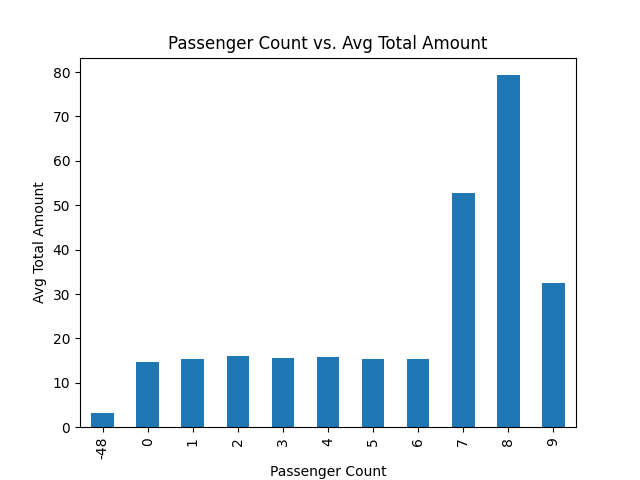

In [32]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt


plt.clf()

#df_grouped = df_dropped.limit(100000000).select('passenger_count', 'total_amount').toPandas().groupby('passenger_count').total_amount.mean()
df_selected.toPandas().groupby('passenger_count').total_amount.mean().plot(kind='bar')

plt.xlabel('Passenger Count')
plt.ylabel('Avg Total Amount')

plt.title('Passenger Count vs. Avg Total Amount')
plt.show()

%matplot plt

In [30]:
# Split the dataset randomly into 70% for training and 30% for testing. Passing a seed for deterministic behavior
df_train, df_validation = df_dropped.randomSplit([0.7, 0.3], seed = 0)
print("There are %d training examples and %d test examples." % (df_train.count(), df_validation.count()))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

There are 737822401 training examples and 316216364 test examples.

In [ ]:
# from pyspark.ml.feature import VectorAssembler, VectorIndexer

# # Remove the target column from the input feature set.
# featuresCols = df_dropped.columns
# featuresCols.remove('total_amount')

# # vectorAssembler combines all feature columns into a single feature vector column, "rawFeatures".
# vectorAssembler = VectorAssembler(inputCols=featuresCols, outputCol="rawFeatures", handleInvalid="skip")

# # vectorIndexer identifies categorical features and indexes them, and creates a new column "features". 
# vectorIndexer = VectorIndexer(inputCol="rawFeatures", outputCol="features", maxCategories=100, handleInvalid="skip")

In [ ]:
# #%matplotlib inline 
# import matplotlib.pyplot as plt

In [ ]:
# type(test)

In [ ]:
# %pip install plotly

In [ ]:
# import pyspark.pandas as ps

# test_df = ps.DataFrame(test['passenger_count', 'total_amount'])

In [ ]:
# test_df = test.to_pandas()

In [ ]:
# type(test_df)

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.clf()
# sns.distplot(test_df['passenger_count'][100],kde=False)
# plt.title('Distribution of Passenger Count')
# plt.show()

# %matplot plt

In [ ]:
# import matplotlib.pyplot as plt
# plt.clf()

# test_df.plot.hist(bins=100)

# %matplot plt

In [ ]:
%help